<a href="https://colab.research.google.com/github/esushmi/my_project/blob/main/Vanishing_gradient_resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [5]:
from sklearn.datasets import make_moons
# make moons gives polynomial data/non linear

In [6]:
x, y = make_moons(n_samples=250, noise=0.05, random_state=1)
#5% data is considered as noisy data

In [7]:
x

array([[-1.27569443e-01,  9.53229096e-01],
       [ 2.06368780e+00,  5.98355087e-01],
       [ 1.79346094e+00,  9.88115574e-02],
       [ 4.69276555e-01, -2.73875152e-01],
       [-7.30348246e-01,  7.85180851e-01],
       [ 1.79698225e+00, -1.22073078e-01],
       [ 3.96654152e-02,  1.02239620e+00],
       [ 1.96829334e+00,  9.78738626e-02],
       [ 8.49609051e-01, -5.41532093e-01],
       [ 1.03496237e+00,  1.03496687e-01],
       [ 1.97498654e+00,  3.18492940e-01],
       [ 1.06877702e+00, -4.62158493e-01],
       [-9.53056675e-01,  2.08183581e-01],
       [ 8.77552461e-01, -4.61068164e-01],
       [ 1.29082208e-02,  4.83478402e-01],
       [-4.09861694e-01,  7.97215923e-01],
       [ 9.76008116e-01, -3.87763931e-01],
       [ 2.97164335e-01,  9.56408968e-01],
       [ 7.68193414e-01,  6.25989329e-01],
       [-2.74225642e-01,  9.05315794e-01],
       [ 1.79490872e+00, -1.21119556e-01],
       [ 6.63812441e-01,  7.43926065e-01],
       [-7.17253019e-01,  6.61649686e-01],
       [ 1.

In [8]:
y

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0])

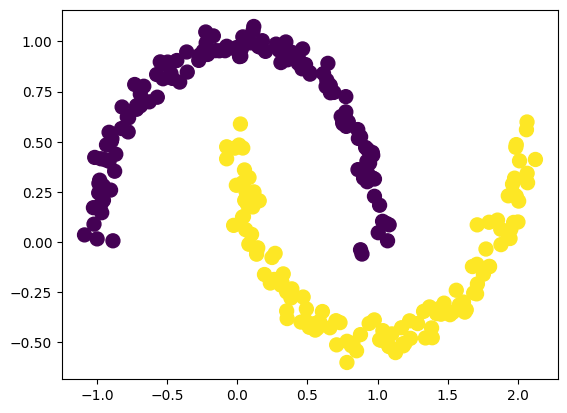

In [9]:
plt.scatter(x[:,0], x[:,1], c=y, s=100)
plt.show()y
#data is non linear, if its linear then simple perceptron can be used
# for non linear data, mlp is used

In [12]:
#building a model
model = Sequential()
model.add(Dense(10, activation='sigmoid',input_dim=2))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

In [17]:
model.get_weights()[0]

array([[ 0.46065682, -0.11538845, -0.1772157 , -0.27187413,  0.4776458 ,
        -0.10189319, -0.11042255,  0.3052352 ,  0.3715381 ,  0.415384  ],
       [-0.47911155,  0.06040472,  0.06247413,  0.30157298, -0.4078473 ,
         0.5797083 ,  0.12117338, -0.03318506, -0.6376373 ,  0.04868585]],
      dtype=float32)

In [18]:
old_weight=model.get_weights()[0]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=1)

In [20]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
7/7 [==============================] - 10s 49ms/step - loss: 0.7520 - accuracy: 0.4900 - val_loss: 0.7140 - val_accuracy: 0.5400
Epoch 2/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7399 - accuracy: 0.4900 - val_loss: 0.7073 - val_accuracy: 0.5400
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7306 - accuracy: 0.4900 - val_loss: 0.7014 - val_accuracy: 0.5400
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.7216 - accuracy: 0.4900 - val_loss: 0.6971 - val_accuracy: 0.5400
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.7143 - accuracy: 0.4900 - val_loss: 0.6939 - val_accuracy: 0.5400
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.7083 - accuracy: 0.4900 - val_loss: 0.6917 - val_accuracy: 0.5400
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.7046 - accuracy: 0.4900 - val_loss: 0.6904 - val_accuracy: 0.5400
Epoch 8/100
7/7 [====

In [21]:
new_weight=model.get_weights()[0]

In [22]:
new_weight

array([[ 0.4628981 , -0.11602423, -0.17008668, -0.2688217 ,  0.47830725,
        -0.10084668, -0.10870993,  0.3017473 ,  0.37149733,  0.41364384],
       [-0.48078975,  0.0608759 ,  0.05734993,  0.2993503 , -0.40836728,
         0.57894295,  0.11991538, -0.03064468, -0.6376299 ,  0.0500398 ]],
      dtype=float32)

In [23]:
old_weight

array([[ 0.46065682, -0.11538845, -0.1772157 , -0.27187413,  0.4776458 ,
        -0.10189319, -0.11042255,  0.3052352 ,  0.3715381 ,  0.415384  ],
       [-0.47911155,  0.06040472,  0.06247413,  0.30157298, -0.4078473 ,
         0.5797083 ,  0.12117338, -0.03318506, -0.6376373 ,  0.04868585]],
      dtype=float32)

In [24]:
model.optimizer.get_config()['learning_rate']
#sytem has taken this learning rate

0.001

In [25]:
gradient=(old_weight-new_weight)/0.001
#gradient is weightnew=weightold-eta*partial derivative, using
#that formula get gradient equation(partial derivative alone)

percent_change = abs(100*(old_weight-new_weight)/0.001)

In [26]:
gradient

array([[-2.2412837 ,  0.63578033, -7.129013  , -3.052443  , -0.6614327 ,
        -1.0465086 , -1.7126201 ,  3.4879146 ,  0.04076957,  1.7401575 ],
       [ 1.6781985 , -0.47118214,  5.1242    ,  2.222687  ,  0.5199909 ,
         0.7653236 ,  1.2580006 , -2.5403833 , -0.00739098, -1.353953  ]],
      dtype=float32)

In [27]:
percent_change

array([[224.12836   ,  63.578037  , 712.9013    , 305.24432   ,
         66.14327   , 104.65085   , 171.26202   , 348.79147   ,
          4.0769577 , 174.01575   ],
       [167.81985   ,  47.118214  , 512.42      , 222.26869   ,
         51.99909   ,  76.532364  , 125.800064  , 254.03831   ,
          0.73909754, 135.3953    ]], dtype=float32)

# handle vanishing gradient

## approch 1: reduce complexity

In [30]:
model1 = Sequential()
model1.add(Dense(10, activation='sigmoid',input_dim=2))
model1.add(Dense(10, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

In [31]:
model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 29ms/step - loss: 0.7991 - accuracy: 0.5100 - val_loss: 0.8366 - val_accuracy: 0.4600
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.7858 - accuracy: 0.5100 - val_loss: 0.8197 - val_accuracy: 0.4600
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.7724 - accuracy: 0.5100 - val_loss: 0.8046 - val_accuracy: 0.4600
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.7614 - accuracy: 0.5100 - val_loss: 0.7912 - val_accuracy: 0.4600
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.7519 - accuracy: 0.5100 - val_loss: 0.7801 - val_accuracy: 0.4600
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7450 - accuracy: 0.5100 - val_loss: 0.7697 - val_accuracy: 0.4600
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7372 - accuracy: 0.5100 - val_loss: 0.7616 - val_accuracy: 0.4600
Epoch 8/100
7/7 [========

## approach 2: RELU activation

In [32]:
model2 = Sequential()
model2.add(Dense(10, activation='relu',input_dim=2))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [35]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

In [36]:
model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 42ms/step - loss: 0.6933 - accuracy: 0.4550 - val_loss: 0.6925 - val_accuracy: 0.5400
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6926 - accuracy: 0.4900 - val_loss: 0.6912 - val_accuracy: 0.5400
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6911 - accuracy: 0.4900 - val_loss: 0.6889 - val_accuracy: 0.5400
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6890 - accuracy: 0.4900 - val_loss: 0.6857 - val_accuracy: 0.5400
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6857 - accuracy: 0.4900 - val_loss: 0.6807 - val_accuracy: 0.5400
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6808 - accuracy: 0.4900 - val_loss: 0.6729 - val_accuracy: 0.5400
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6729 - accuracy: 0.7050 - val_loss: 0.6604 - val_accuracy: 0.8000
Epoch 8/100
7/7 [=====

## approach 3: combine reduced complexity and relu

In [38]:
model3 = Sequential()
model3.add(Dense(10, activation='relu',input_dim=2))
model3.add(Dense(10, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])

In [39]:
model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 32ms/step - loss: 0.6870 - accuracy: 0.5850 - val_loss: 0.6831 - val_accuracy: 0.6000
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6773 - accuracy: 0.6100 - val_loss: 0.6730 - val_accuracy: 0.6800
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6673 - accuracy: 0.6800 - val_loss: 0.6638 - val_accuracy: 0.6800
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6584 - accuracy: 0.7350 - val_loss: 0.6538 - val_accuracy: 0.7600
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6491 - accuracy: 0.7800 - val_loss: 0.6439 - val_accuracy: 0.7400
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6394 - accuracy: 0.8050 - val_loss: 0.6338 - val_accuracy: 0.7800
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6289 - accuracy: 0.8100 - val_loss: 0.6236 - val_accuracy: 0.7800
Epoch 8/100
7/7 [======